<h2>Анализ аудио</h2>

Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment

C:\Python311\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Импорт звуков

In [7]:
f1 = 'data/sample1.wav'
f2 = 'data/sample2.wav'

In [11]:
samplerate_1, data_1 = wavfile.read(f1)
duration_1 = len(data_1)/samplerate_1
time_1 = np.arange(0,duration_1,1/samplerate_1)

print('Sampling Rate:',samplerate_1)
print('Audio Shape:',np.shape(data_1))
print('Длительность:',duration_1)
print('Временная шкала:',time_1)

Sampling Rate: 48000
Audio Shape: (324168,)
Длительность: 6.7535
Временная шкала: [0.00000000e+00 2.08333333e-05 4.16666667e-05 ... 6.75343750e+00
 6.75345833e+00 6.75347917e+00]


In [12]:
samplerate_2, data_2 = wavfile.read(f2)
duration_2 = len(data_2)/samplerate_2
time_2 = np.arange(0,duration_2,1/samplerate_2)

print('Sampling Rate:',samplerate_2)
print('Audio Shape:',np.shape(data_2))
print('Длительность:',duration_2)
print('Временная шкала:',time_2)

Sampling Rate: 48000
Audio Shape: (551688,)
Длительность: 11.4935
Временная шкала: [0.00000000e+00 2.08333333e-05 4.16666667e-05 ... 1.14934375e+01
 1.14934583e+01 1.14934792e+01]


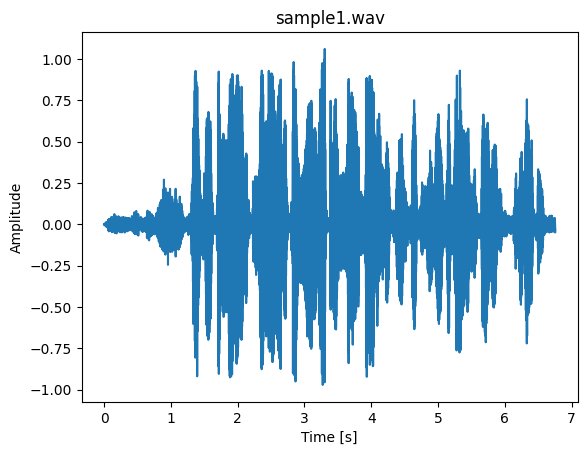

In [13]:
plt.plot(time_1, data_1)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('sample1.wav')
plt.show()

Звуковой файл изначально в моно, поэтому граф исключительно синий

Отображение спектрограммы

C:\Users\artem\AppData\Local\Temp\ipykernel_12368\3241017578.py:5: RuntimeWarning: divide by zero encountered in log
  lspg = np.log(spgram)


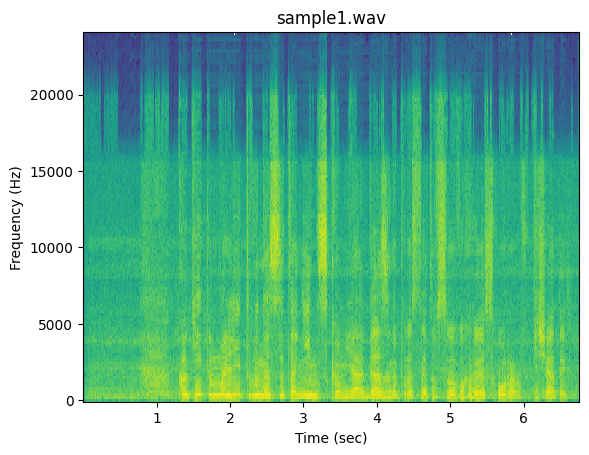

In [22]:
adata = data_1
s = samplerate_1

fr, tm, spgram = signal.spectrogram(adata,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.title('sample1.wav')
plt.show()

C:\Users\artem\AppData\Local\Temp\ipykernel_12368\1143535891.py:5: RuntimeWarning: divide by zero encountered in log
  lspg = np.log(spgram)


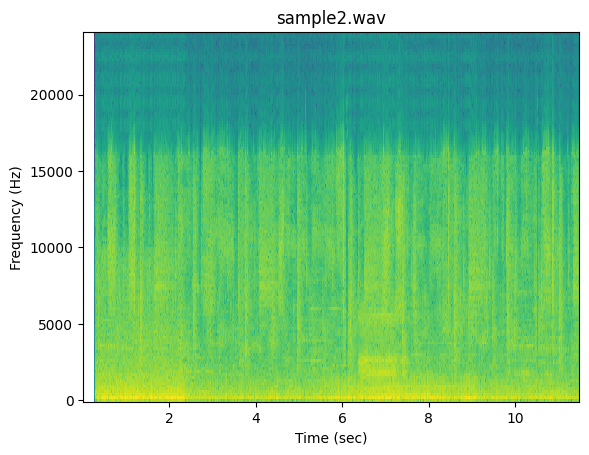

In [23]:
adata = data_2
s = samplerate_2

fr, tm, spgram = signal.spectrogram(adata,s)
lspg = np.log(spgram)
plt.pcolormesh(tm,fr,lspg,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.title('sample2.wav')
plt.show()

Быстрое преобразование Фурье
на примере файла №1

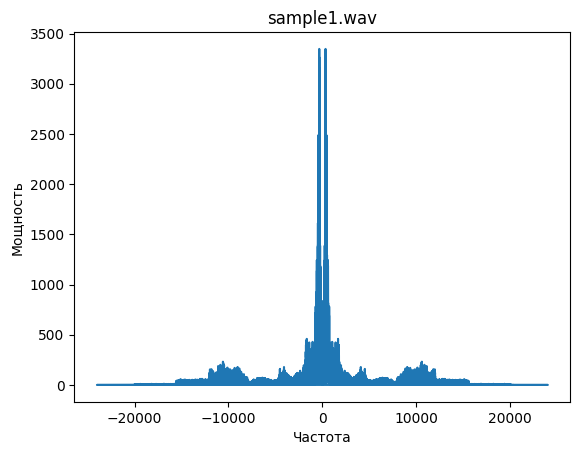

In [24]:
from scipy.fft import fft, fftfreq

# число точек в normalized_tone
N = int(samplerate_1 * duration_1)

yf = fft(data_1)
xf = fftfreq(N, 1 / samplerate_1)

plt.plot(xf, np.abs(yf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.title('sample1.wav')
plt.show()

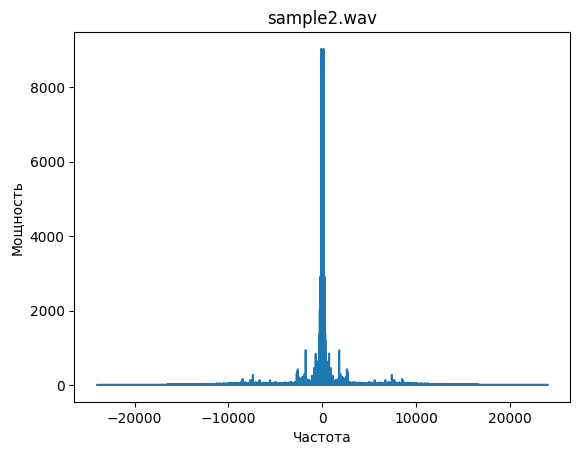

In [25]:
N = int(samplerate_2 * duration_2)

yf = fft(data_2)
xf = fftfreq(N, 1 / samplerate_2)

plt.plot(xf, np.abs(yf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.title('sample2.wav')
plt.show()

Оба частотных спектра симметричны:

In [33]:
from scipy.fft import rfft, rfftfreq, irfft

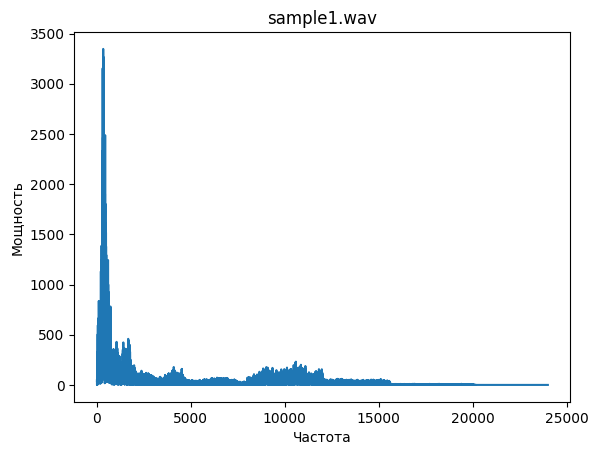

In [30]:
rN = int(samplerate_1 * duration_1)

ryf = rfft(data_1)
rxf = rfftfreq(rN, 1 / samplerate_1)

plt.plot(rxf, np.abs(ryf))
plt.xlabel('Частота')
plt.ylabel('Мощность')
plt.title('sample1.wav')
plt.show()

Фильтрация частоты

In [31]:
# Максимальная частота составляет половину частоты дискретизации
points_per_freq = len(rxf) / (samplerate_1 / 2)

# Наша целевая частота 
target_idx = int(points_per_freq * 4998.663426488456)

target_idx1 = int(points_per_freq * 10000)

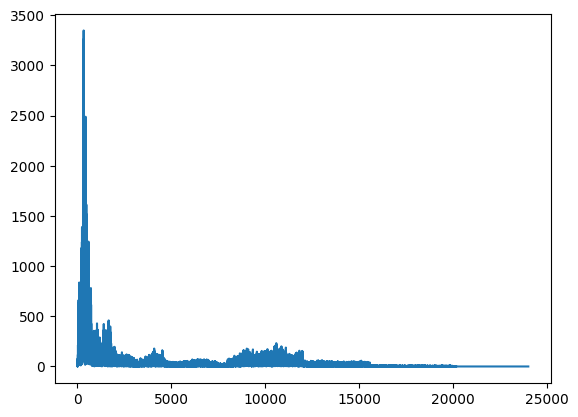

In [32]:
ryf[target_idx-2:target_idx+2] = 0


plt.plot(rxf, np.abs(ryf))
plt.show()

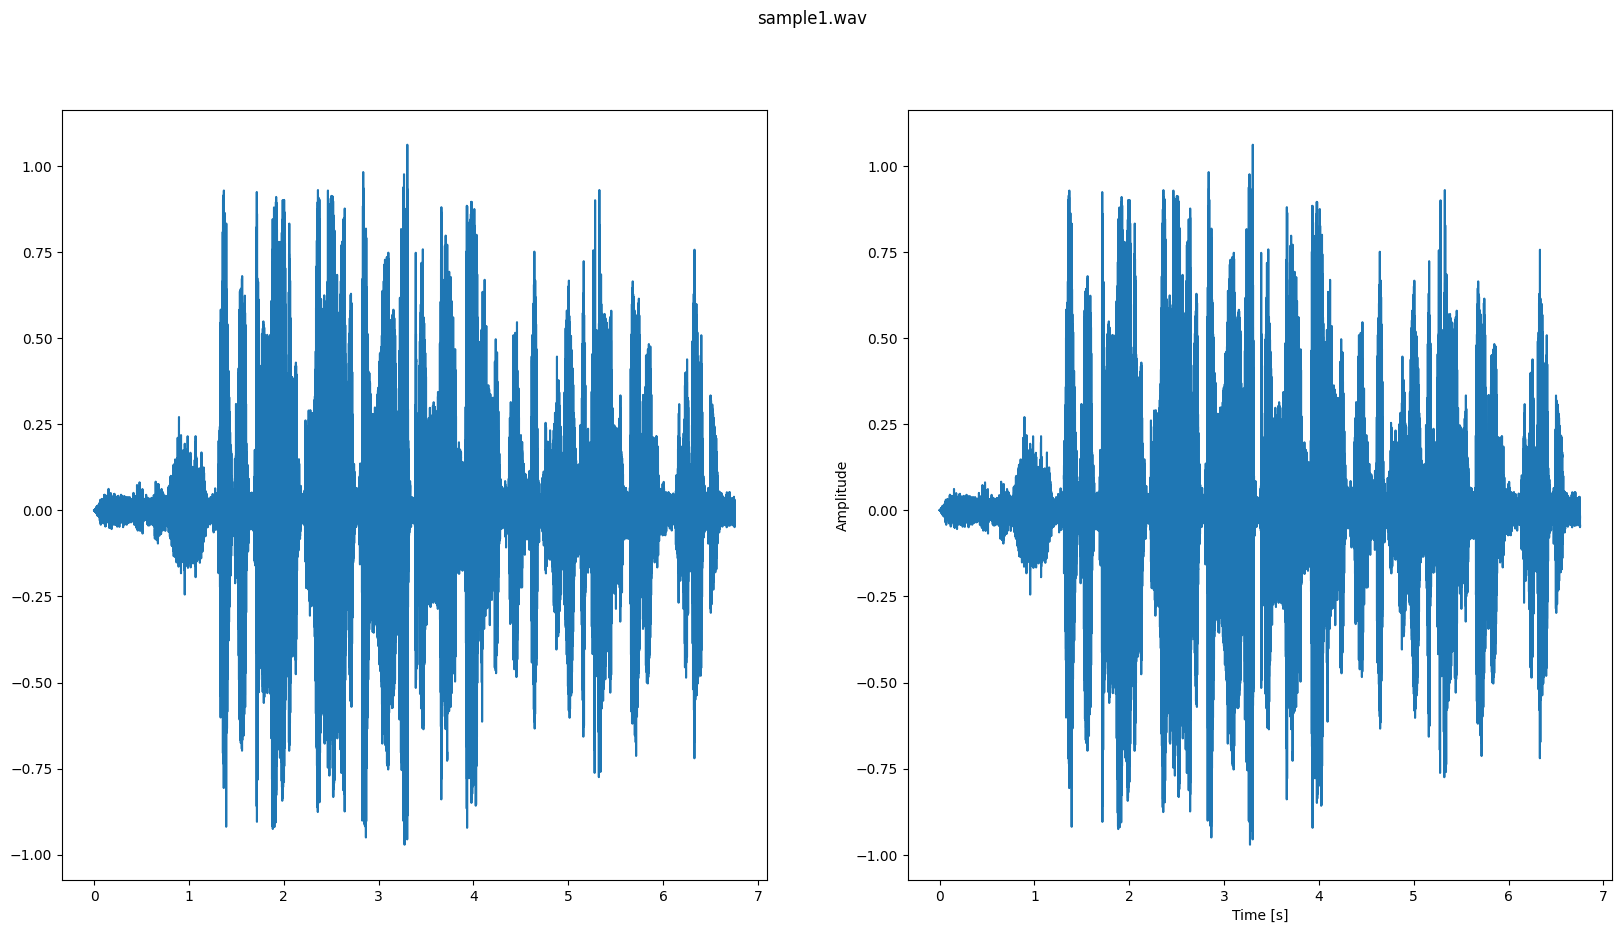

In [40]:
new_sig = irfft(ryf)

fig, ax = plt.subplots(nrows= 1 , ncols= 2, figsize=(20, 10) )

ax[0].plot(time_1, data_1)
ax[1].plot(time_1, new_sig)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
fig.suptitle('sample1.wav')
plt.show()

In [42]:
sd.play(new_sig, samplerate_1)
sd.wait()

<h3>Спектральные характеристики</h3>
Мел-кепстральные коэффициенты (MFCC) и гамматон-частотные кепстральные коэффициенты (GFCC)

In [51]:
import librosa
import scipy
from spafe.features.gfcc import gfcc

<h4>Мел-кепстральные коэффициенты (MFCC)</h4>

[Text(0.5, 1.0, 'MFCC')]

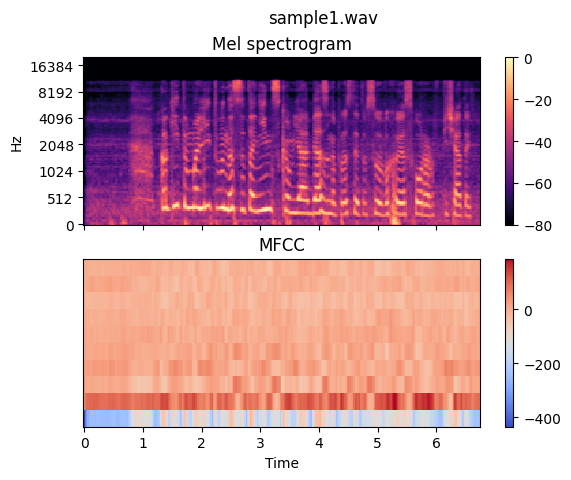

In [54]:
sample_1, sample_rate_1 = librosa.load("data/sample1.wav")

y_1 = sample_1
sr_1 = sample_rate_1
mfccs_1 = librosa.feature.mfcc(y=y_1, sr=sr_1, n_mfcc=10)

S_1 = librosa.feature.melspectrogram(y=y_1, sr=sr_1, n_mels=128, fmax=20000)
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S_1, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=20000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs_1, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
fig.suptitle('sample1.wav')
ax[1].set(title='MFCC')

[Text(0.5, 1.0, 'MFCC')]

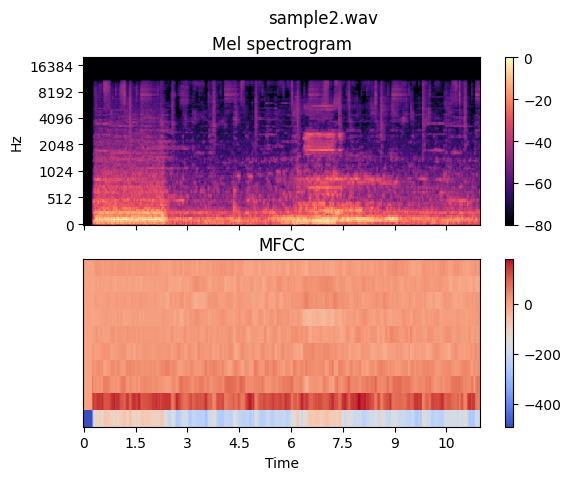

In [55]:
sample_2, sample_rate_2 = librosa.load("data/sample2.wav")

y_2 = sample_2
sr_2 = sample_rate_2
mfccs_2 = librosa.feature.mfcc(y=y_2, sr=sr_2, n_mfcc=10)

S_2 = librosa.feature.melspectrogram(y=y_2, sr=sr_2, n_mels=128, fmax=20000)
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S_2, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=20000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
fig.suptitle('sample2.wav')
ax[1].set(title='MFCC')

Цвета в MFCC у второго файла более тёмные, что может свидетельствовать о более низких значениях частот.<br>У мел-спектограммы второго звука более высокие значения показаны лишь в начале и середине, тогда как у первого звука они более частые и начинаются не сразу. Это обусловлено характеристикой записей. Первый звук - запись разговора, который начинается на 1 секунде. Второй звук - фоновая музыка и резкие звуки на 1 и 7 секундах.

<h4>Гамматон-частотные кепстральные коэффициенты (GFCC)</h4>

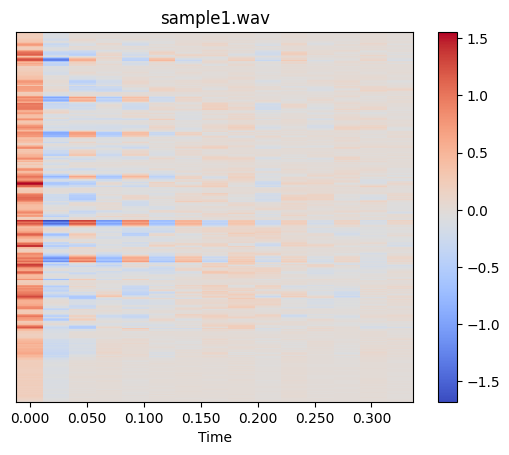

In [60]:
gfccs_1 = gfcc(y_1, fs=sr_1, num_ceps=15)
librosa.display.specshow(gfccs_1, x_axis='time', sr=sr_1)
plt.colorbar()
plt.title('sample1.wav')
plt.show()

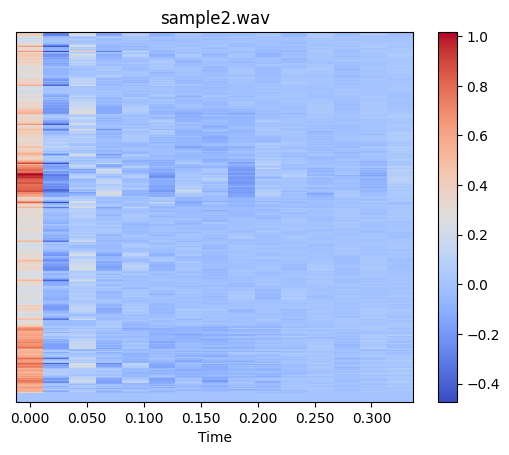

In [57]:
gfccs_2 = gfcc(y_2, fs=sr_2, num_ceps=15)
librosa.display.specshow(gfccs_2, x_axis='time', sr=sr_2)
plt.colorbar()
plt.title('sample2.wav')
plt.show()

Графики отличаются цветовой гаммой. Связано это с различным разбросом значений GFCC. У первого звука нулевое значение шкалы приходится на серый цвет, тогда как у второго звука приходится на светло-голубой цвет.